In [1]:

#title: "Linear Regression Analysis Template"
#author: "Muuzaani Nkhoma"
#date: "February 13, 2020"


In [2]:
### Load Packages
import numpy as np
import pandas as pd
import sklearn                           # for statistical modeling
import statsmodels.api as sm             # for advanced statistical modeling
import statsmodels.formula.api as smf
import seaborn as sns                    # Seaborn visualization library
from matplotlib import pyplot as plt


In [3]:
## Read and prepare the data
# Read data from file 'filename.csv' 
jet = pd.read_csv("Data Linear Models\data-table-B13.csv") 
jet.shape

(40, 7)

In [4]:
jet.isnull().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

In [5]:
##View first observations
jet.head()

,y,x1,x2,x3,x4,x5,x6
0,4540,2140,20640,30250,205,1732,99
1,4315,2016,20280,30010,195,1697,100
2,4095,1905,19860,29780,184,1662,97
3,3650,1675,18980,29330,164,1598,97
4,3200,1474,18100,28960,144,1541,97


In [6]:
#### View last observations
jet.tail()

,y,x1,x2,x3,x4,x5,x6
35,4402,2066,20520,30170,197,1758,100
36,4180,1954,20150,29950,188,1729,99
37,3973,1835,19750,29740,178,1690,99
38,3530,1616,18850,29320,156,1616,99
39,3080,1407,17910,28910,137,1569,100


In [7]:
#### Summary Statistics
jet.describe()

,y,x1,x2,x3,x4,x5,x6
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,3904.000000,1809.925000,19494.600000,29605.77500,174.500000,1651.900000,97.425000
std,504.646004,251.950482,940.944419,466.21776,23.436767,68.895983,4.717059
min,3045.000000,1388.000000,17780.000000,28675.00000,133.000000,1522.000000,85.000000
25%,3517.500000,1607.750000,18880.000000,29302.50000,155.250000,1592.500000,97.000000
50%,3977.000000,1849.500000,19765.000000,29745.00000,179.000000,1668.000000,99.000000
75%,4332.500000,2023.750000,20286.250000,29960.00000,193.500000,1709.500000,100.000000
max,4833.000000,2239.000000,20740.000000,30250.00000,216.000000,1758.000000,102.000000


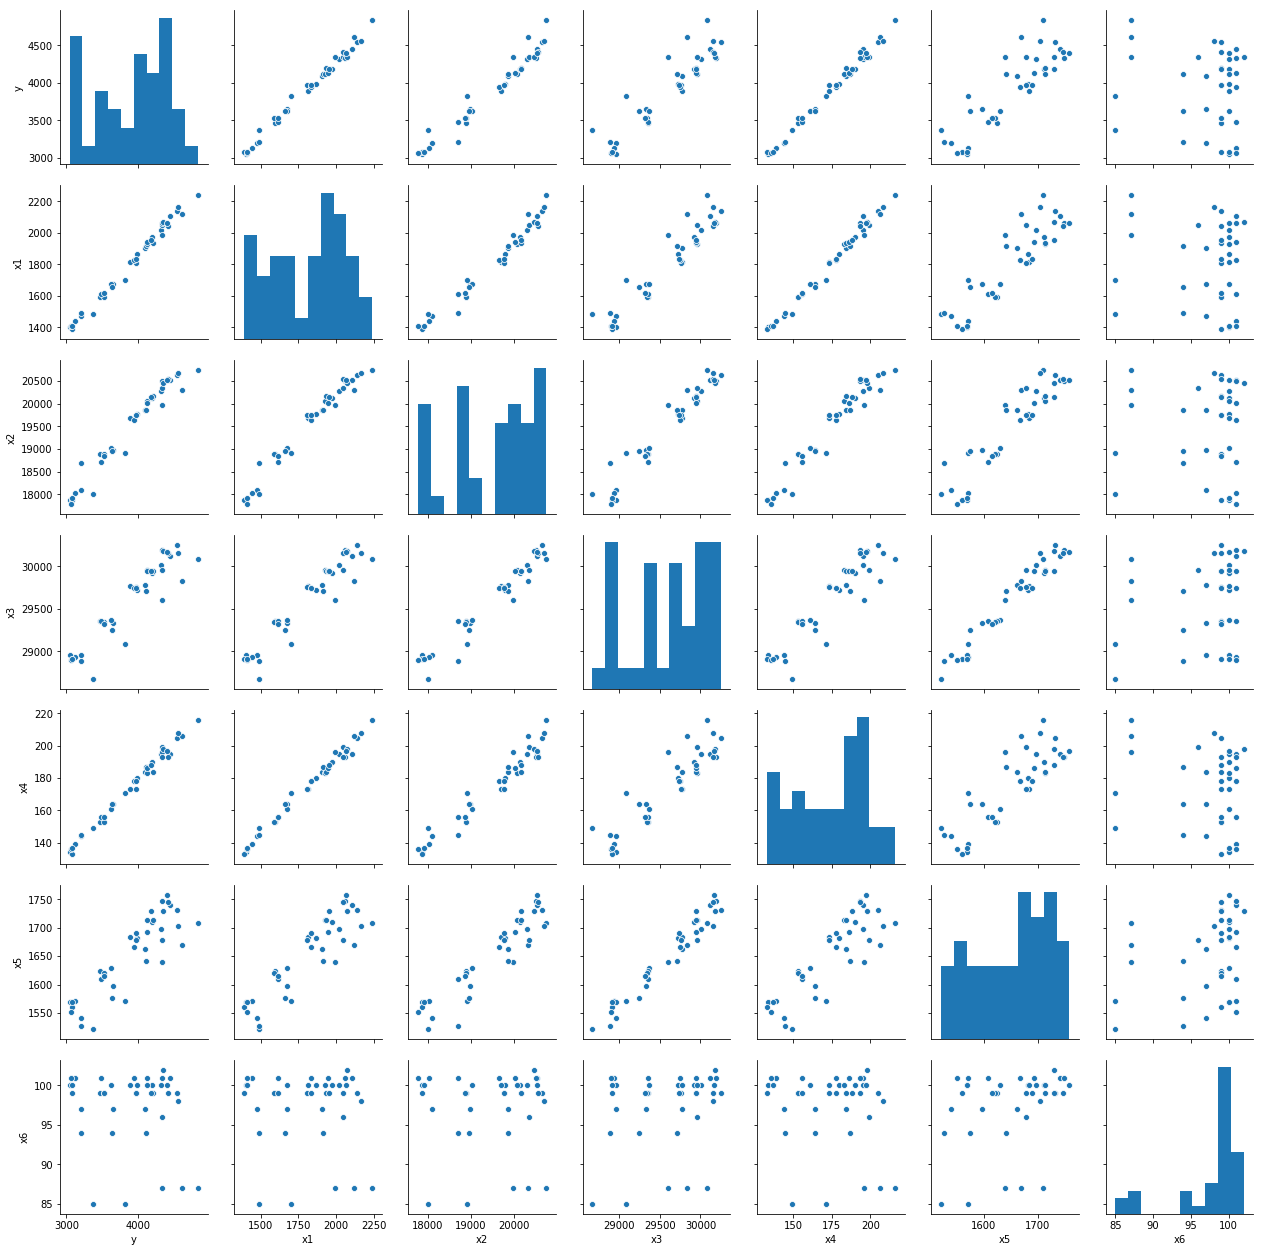

In [8]:
### # Plot Scatterplots to investigate the linear relationship between response and # regressor variables
# Create the default pairplot
sns.pairplot(jet)

In [9]:
# Test for correlation to get the values of the correlation between response and 
# regressor variables
jet.corr()

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.995010,0.976048,0.928792,0.995112,0.871693,-0.147441
x1,0.995010,1.000000,0.985178,0.950396,0.993965,0.894030,-0.072745
x2,0.976048,0.985178,1.000000,0.972304,0.971859,0.926747,0.017133
x3,0.928792,0.950396,0.972304,1.000000,0.920314,0.975750,0.216466
x4,0.995112,0.993965,0.971859,0.920314,1.000000,0.851901,-0.153425
x5,0.871693,0.894030,0.926747,0.975750,0.851901,1.000000,0.301764
x6,-0.147441,-0.072745,0.017133,0.216466,-0.153425,0.301764,1.000000


In [10]:
#  Create new dataframes
X = jet[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]   # Creates independent variables dataframe
X.shape

(40, 6)

In [11]:
Y = jet[['y']]   # Creates dependent variable(s) dataframe
Y.shape

(40, 1)

In [12]:
###Fit the Full model with all regressor variables
#X = sm.add_constant(X)
#jet_model = sm.OLS(Y, X)
jet_model = smf.ols('y ~ x1 + x2 + x3 + x4 + x5 + x6', data=jet).fit()

In [13]:
#Fit Predicted and Residual Values
pred_val = jet_model.fittedvalues.copy()
true_val = jet['y'].values.copy()
residual = true_val - pred_val

In [14]:
#Full Model Summary
jet_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2350.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           6.07e-42
Time:                        20:36:03   Log-Likelihood:                -184.01
No. Observations:                  40   AIC:                             382.0
Df Residuals:                      33   BIC:                             393.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4738.0149   2444.740     -1.938      0.061   -9711.877     235.847
x1             1.1185      0.286      3.904      0.000       0.536       1.701
x2            -0.0302      0.038     -0.789      0.435      -0.108       0.048
x3             0.2306      0.118      1.954      0.059      -0.010       0.471
x4             3.8495      2.686      1.433      0.161      -1.616       9.315
x5             0.8219      0.351      2.343      0.025       0.108       1.535
x6           -16.9465      2.620     -6.468      0.000     -22.277     -11.616
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.855
Skew:                           0.174   Prob(JB):                        0.652
Kurtosis:                       2.374   Cond. No.                     2.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
## Variance Inflation Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,14160.6,x1
1,26832.7,x2
2,17359.2,x3
3,12668.2,x4
4,12962.6,x5
5,1533.6,x6


In [16]:
###Eigensystem Analysis

# Condition Number          < 100: No serious problem
# 100<= condition number < 1000: Moderate to strong multicollinerity
# Condition Number       >= 1000: Severe multicollinearity

#At least one condition Index >= 1000 means near linear dependency

np.linalg.cond(jet_model.model.exog)

20732109.3995254

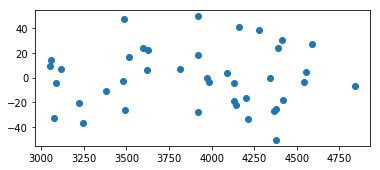

In [17]:
#### Full Model Diagnostics

#(Are all the conditions satisfied? LINE)
#(What regressors seem important?)
#(Any Possible Outliers?)
#(Is there any need for transformation of response or regressor variables?)

#Residual Analysis
# Residuals Plot
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val, residual)

0.9880947673485304

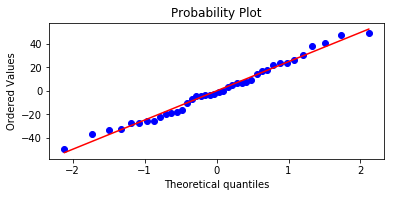

In [18]:
# Probability Plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [19]:
##### Model and Variable Selection

### (To be performed if the number of variables is very large)
### (Otherwise go straight to All Possible Regression )

#Stepwise Regression Model Selection
import stepwise-regression

SyntaxError: invalid syntax (<ipython-input-19-c5496f695497>, line 7)